In [638]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FixedLocator, FixedFormatter, LogLocator, NullFormatter, LogFormatter, EngFormatter, AutoMinorLocator)
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import struct
%matplotlib inline

# Defaults more suitable for 4K monitors
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = [6.0, 4.0]

# Export settings
mpl.rcParams["savefig.bbox"] = 'tight'
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.facecolor"] = 'white'

# Lossless using WebP
#mpl.rcParams["animation.codec"] = 'webp'
#mpl.rcParams["animation.ffmpeg_args"] = ["-preset", "drawing", "-lossless", "1"]
# Use anim.save("movie.webp", fps=60)

# Lossy using AV1
mpl.rcParams["animation.codec"] = 'libaom-av1'
mpl.rcParams["animation.ffmpeg_args"] = []
# Use anim.save("movie.webm", fps=60)


In [639]:
import glob
import re

dfs = []
for path in glob.glob('./results/*/*/run*.csv'):
    m = re.match(r'.*/(.*)/(.*)/[^/]*', path)
    (machine, algo) = (m.group(1), m.group(2))
    df = pd.read_csv(path)
    df['machine'] = machine
    df['algo'] = algo
    dfs.append(df)
df = pd.concat(dfs)

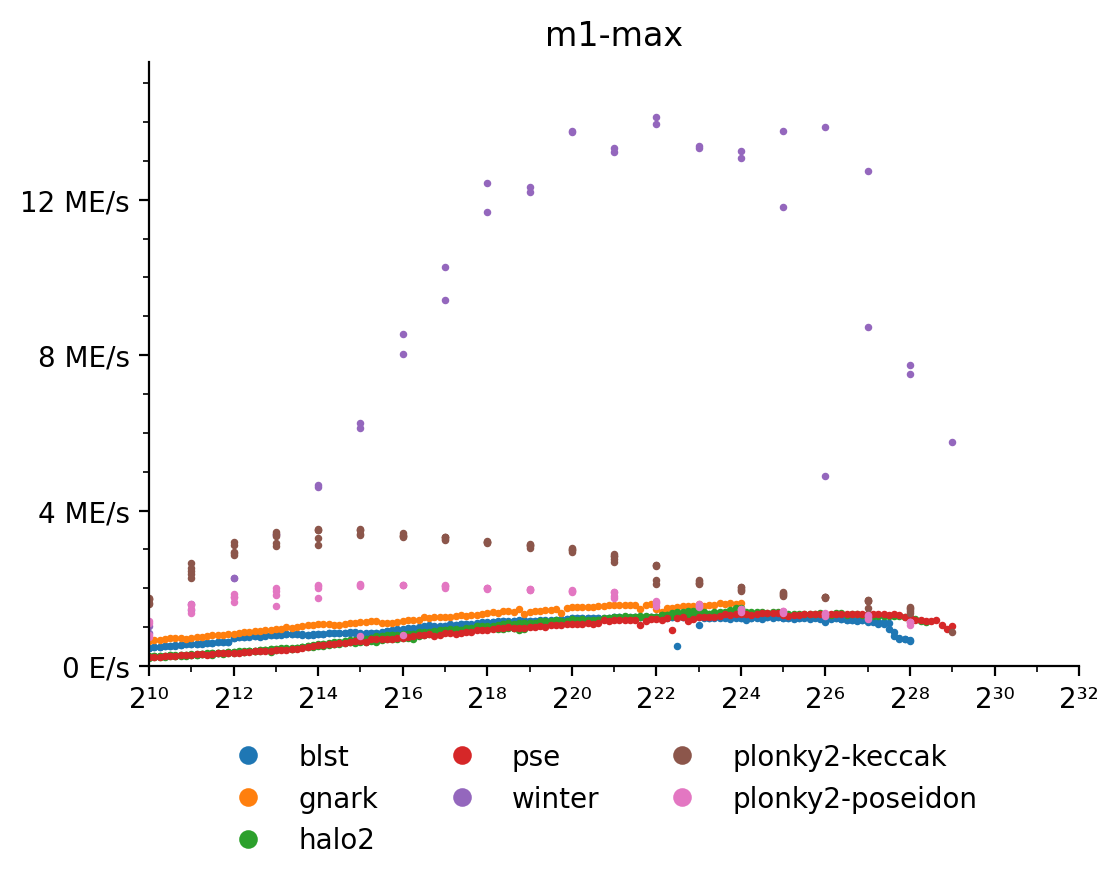

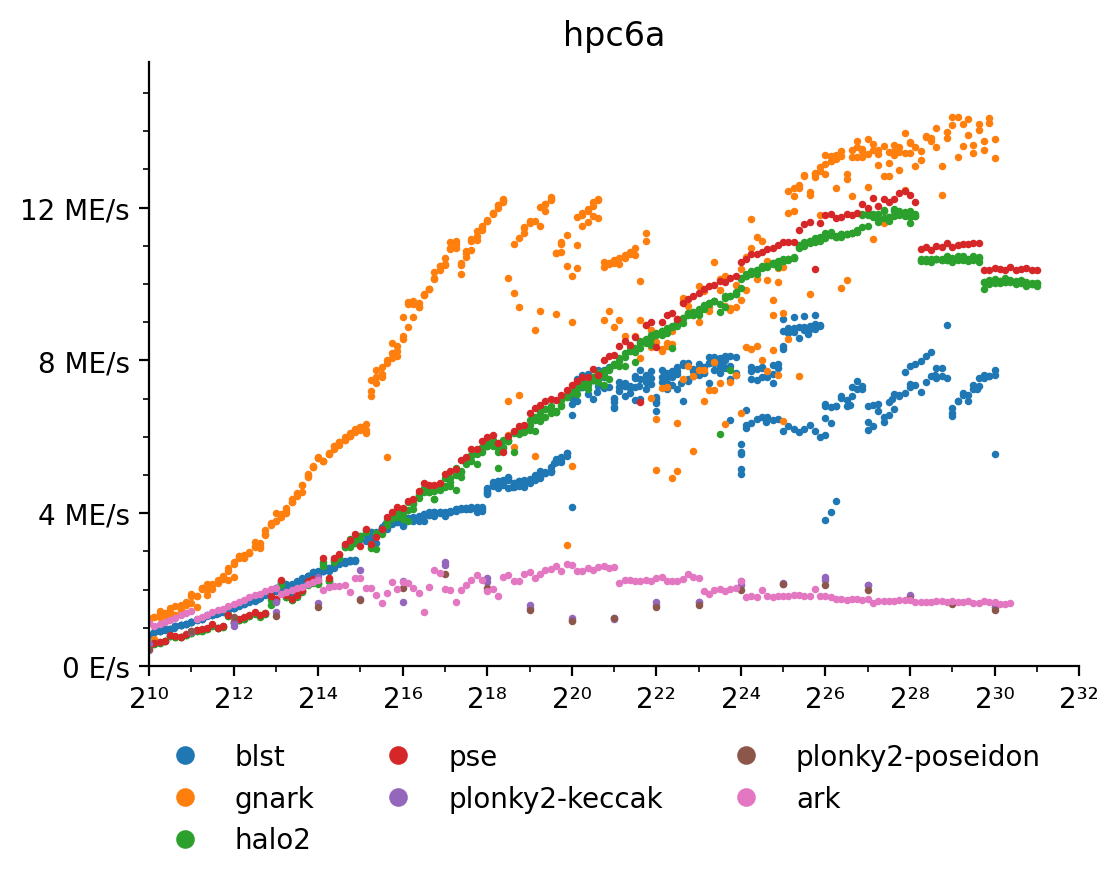

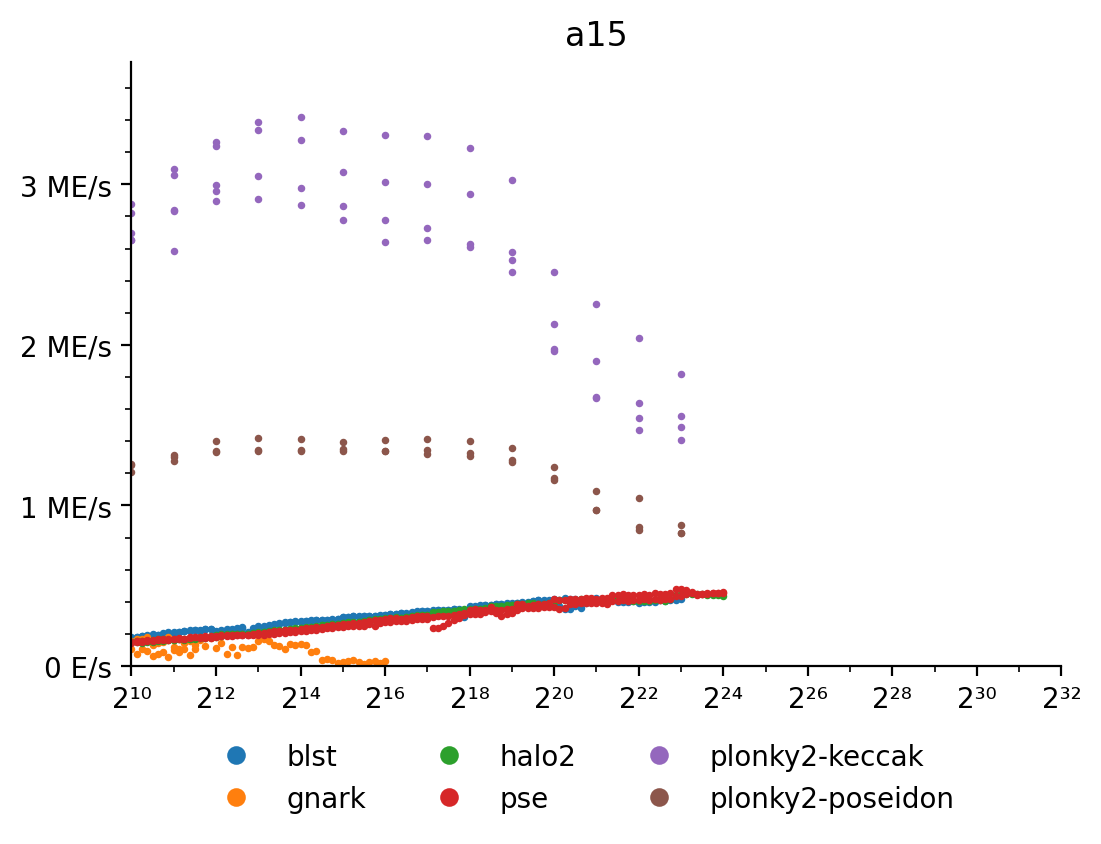

In [640]:
for machine in df['machine'].unique():

    fig, ax = plt.subplots()

    # Plot algos and runs for the machine
    dfm = df[df['machine'] == machine]
    max_y = 0.0
    for algo in dfm['algo'].unique():
        # if algo == 'plonky2-keccak' or algo == 'plonky2-poseidon':
        #     continue
        dfa = dfm[dfm['algo'] == algo]
        max_y = max(max_y, dfa['throughput'].max())
        ax.plot(dfa['size'], dfa['throughput'], marker='.', alpha=1.0, markersize=4, markeredgewidth=0.7, linestyle='none', label=algo)

    # Framing
    ax.set_title(machine)
    ax.set_clip_on(False)
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

    # X axis
    ax.set_xlim((2**10, 2**32))
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(FixedLocator([2**i for i in range(10,33,2)]))
    ax.xaxis.set_major_formatter(FixedFormatter(["2¹⁰", "2¹²", "2¹⁴", "2¹⁶", "2¹⁸", "2²⁰", "2²²", "2²⁴", "2²⁶", "2²⁸", "2³⁰", "2³²"]))
    ax.xaxis.set_minor_locator(FixedLocator([2**i for i in range(10,33)]))
    ax.xaxis.set_minor_formatter(NullFormatter())

    # Y axis
    ax.set_ylim((0, 1.1 * max_y))
    ax.yaxis.set_major_formatter(EngFormatter(unit='E/s'))
    if max_y < 1e6:
        ax.yaxis.set_major_locator(MultipleLocator(1.0e5))
        ax.yaxis.set_minor_locator(MultipleLocator(0.2e5))
    elif max_y < 10e6:
        ax.yaxis.set_major_locator(MultipleLocator(1.0e6))
        ax.yaxis.set_minor_locator(MultipleLocator(0.2e6))
    else:
        ax.yaxis.set_major_locator(MultipleLocator(4.0e6))
        ax.yaxis.set_minor_locator(MultipleLocator(1.0e6))

    fig.legend(bbox_to_anchor=(0.5, 0.06), loc='upper center', ncol=3, frameon=False, markerscale=3)
    
    fig.savefig(f'bench-{machine}.png')
